# Гладких Алексей. Машинное обучение

В данном проекте будет рассмотрено несколько вариантов применения моделей машинного обучения. Датасет и задание взято из интернета

Задание для проекта взято из источника [Kaggle открытый проект](https://www.kaggle.com/arturmatosyan/notebook93a94bb3fa)

## Загрузка библиотек и функций, необходимых для работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [55]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Предобработка данных

### Описание датасета

* **Id** - идентификационный номер квартиры,
* **DistrictId** - идентификационный номер района,
* **Rooms** - количество комнат,
* **Square** - площадь,
* **LifeSquare** - жилая площадь,
* **KitchenSquare** - площадь кухни,
* **Floor** - этаж,
* **HouseFloor** - количество этажей в доме,
* **HouseYear** - год постройки дома,
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности,
* **Social_1, Social_2, Social_3** - социальные показатели местности,
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья,
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров,
* **Price** - цена квартиры

Целевая переменная - ***Price***

In [56]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [58]:
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

None

In [59]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [60]:
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_test['DistrictId'] = df_test['DistrictId'].astype(str)
df_train['Id'] = df_train['DistrictId'].astype(str)
df_test['Id'] = df_test['Id'].astype(str)

In [8]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


> В данных данных сразу можно заметить, что в максимальное значение площади меньше, чем максимальное значение жилой площади. Следовательно после обработки пропусков нужно проверить данные на корректность

In [9]:
df_train.describe(include='object')

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000,10000,10000
unique,205,205,2,2,2
top,27,27,B,B,B
freq,851,851,9903,9725,9175


In [70]:
profile = pandas_profiling.ProfileReport(df_train)
profile.to_file("output.html")
#pandas_profiling.ProfileReport(df_train)

Дополнительная документация
https://ipywidgets.readthedocs.io/en/stable/user_install.html

### Обработка пропусков

<AxesSubplot:>

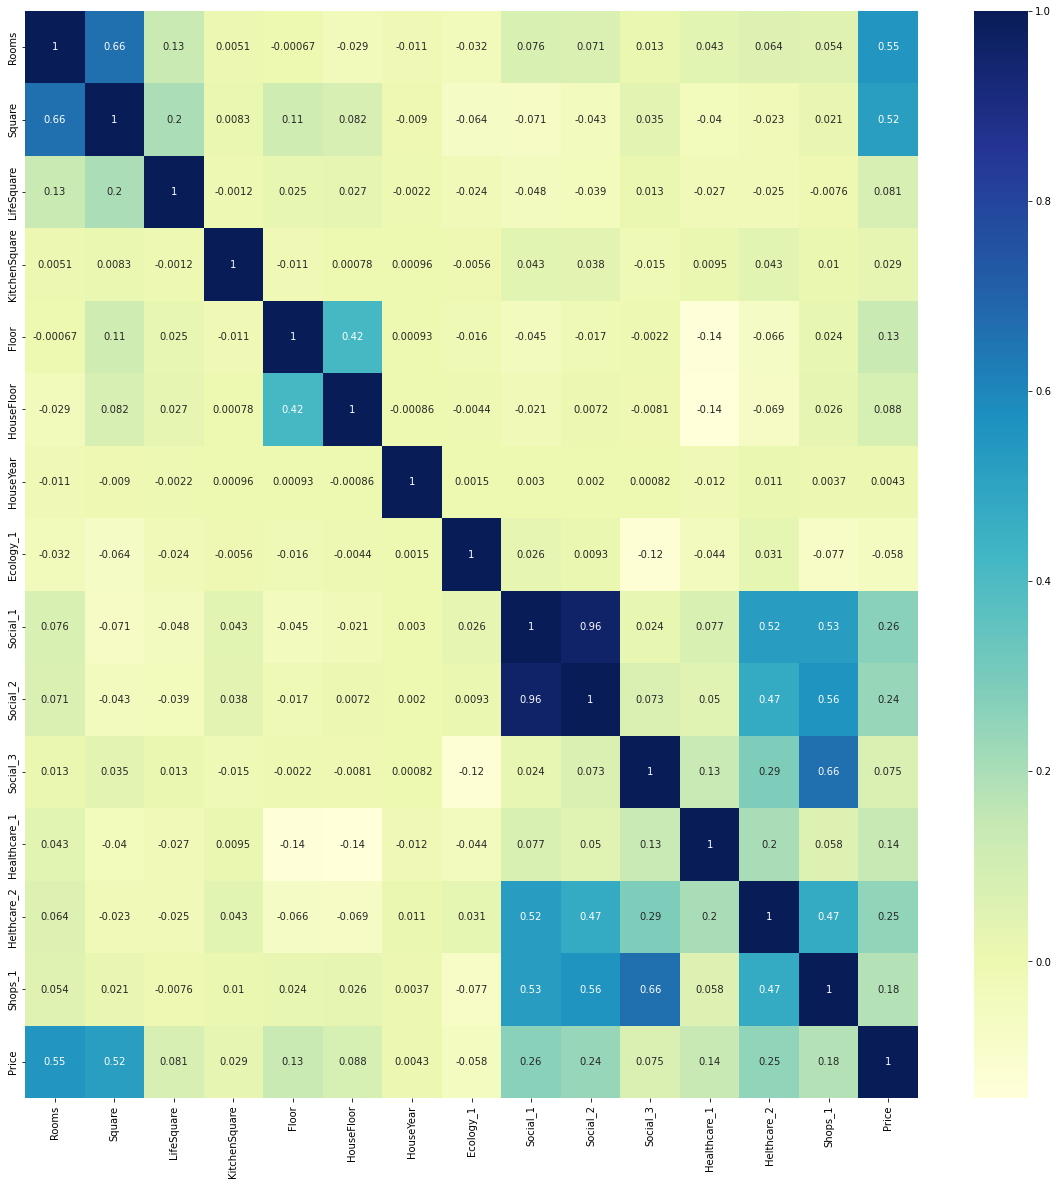

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True, cmap="YlGnBu")

In [11]:
df_train.isna().sum()[df_train.isna().sum()!=0]

LifeSquare      2113
Healthcare_1    4798
dtype: int64

In [12]:
df_train.dropna(axis=0,subset =['LifeSquare']).corr()['LifeSquare'].sort_values(ascending=False)

LifeSquare       1.000000
Square           0.196129
Rooms            0.131336
Price            0.081292
HouseFloor       0.027442
Floor            0.024559
Social_3         0.012763
KitchenSquare   -0.001195
HouseYear       -0.002210
Shops_1         -0.007569
Ecology_1       -0.023629
Helthcare_2     -0.024762
Healthcare_1    -0.026867
Social_2        -0.039283
Social_1        -0.048363
Name: LifeSquare, dtype: float64

In [13]:
df_train.dropna(axis=0,subset =['Healthcare_1']).corr()['Healthcare_1'].sort_values(ascending=False)

Healthcare_1     1.000000
Helthcare_2      0.203177
Price            0.138755
Social_3         0.133877
Social_1         0.077133
Shops_1          0.057758
Social_2         0.050458
Rooms            0.042857
KitchenSquare    0.009472
HouseYear       -0.011969
LifeSquare      -0.026867
Square          -0.039748
Ecology_1       -0.043547
Floor           -0.138294
HouseFloor      -0.143973
Name: Healthcare_1, dtype: float64

#### 1 вариант 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
df_train_SF_X = df_train.dropna(axis=0,subset =['LifeSquare'])[['Square','Rooms']]
df_train_SF_y = df_train.dropna(axis=0,subset =['LifeSquare'])[['LifeSquare']]

model = LinearRegression()

model.fit(df_train_SF_X,df_train_SF_y)

df_test_SF_X = df_test.dropna(axis=0,subset =['LifeSquare'])[['Square','Rooms']]
df_test_SF_y = df_test.dropna(axis=0,subset =['LifeSquare'])[['LifeSquare']]

df_test_SF_y_pred = model.predict(df_test_SF_X)

mean_squared_error(df_test_SF_y,df_test_SF_y_pred)

167.88063622513

#### 2 вариант 

In [16]:
df_train_LS = df_train.dropna(axis=0,subset =['LifeSquare'])
df_train_LS['LifeSquare_1'] = \
    df_train['Square'] - df_train['KitchenSquare']

C:\Users\5078~1\AppData\Local\Temp/ipykernel_18400/1342074709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_LS['LifeSquare_1'] = \


In [17]:
mean_squared_error(df_train_LS['LifeSquare_1'],df_train_LS['LifeSquare'])

8263.593783765

In [18]:
df_test_LS = df_test.dropna(axis=0,subset =['LifeSquare'])
df_test_LS['LifeSquare_1'] = \
    df_test['Square'] - df_test['KitchenSquare']

C:\Users\5078~1\AppData\Local\Temp/ipykernel_18400/3829572944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_LS['LifeSquare_1'] = \


In [19]:
mean_squared_error(df_test_LS['LifeSquare_1'],df_test_LS['LifeSquare'])

429.98841393712564

#### Итого используем 1 вариант

In [20]:
df_train_X = df_train[df_train['LifeSquare'].isnull()][['Square','Rooms']]
df_train.loc[df_train['LifeSquare'].isna(), 'LifeSquare']= model.predict(df_train_X)
df_test_X = df_test[df_test['LifeSquare'].isnull()][['Square','Rooms']]
df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare']= model.predict(df_test_X)

In [21]:
df_train_HT_X = df_train.dropna(axis=0,subset =['Healthcare_1'])[['Helthcare_2','Social_3']]
df_train_HT_y = df_train.dropna(axis=0,subset =['Healthcare_1'])[['Healthcare_1']]

model = LinearRegression()

model.fit(df_train_HT_X,df_train_HT_y)

df_test_HT_X = df_test.dropna(axis=0,subset =['Healthcare_1'])[['Helthcare_2','Social_3']]
df_test_HT_y = df_test.dropna(axis=0,subset =['Healthcare_1'])[['Healthcare_1']]

df_test_HT_y_pred = model.predict(df_test_HT_X)

mean_squared_error(df_test_HT_y,df_test_HT_y_pred)

1043161.7360736692

In [22]:
df_train_X = df_train[df_train['Healthcare_1'].isnull()][['Helthcare_2','Social_3']]
df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1']= model.predict(df_train_X)
df_test_X = df_test[df_test['Healthcare_1'].isnull()][['Helthcare_2','Social_3']]
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1']= model.predict(df_test_X)

### Обработка выбросов

In [23]:
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

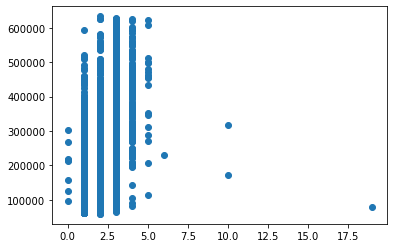

In [24]:
plt.scatter(df_train['Rooms'], df_train['Price'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


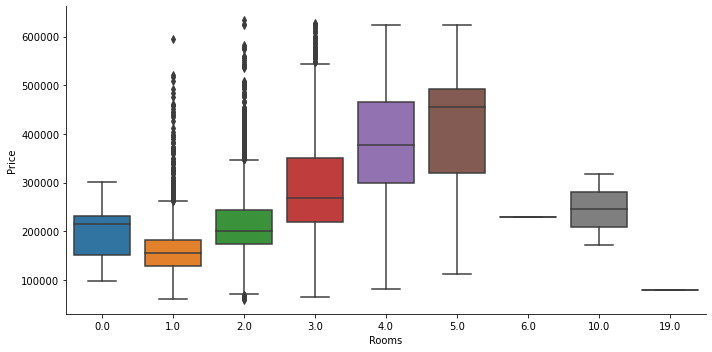

In [25]:
sns.catplot('Rooms', 'Price', kind="box", data=df_train, aspect=2/1);

In [26]:
df_test['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

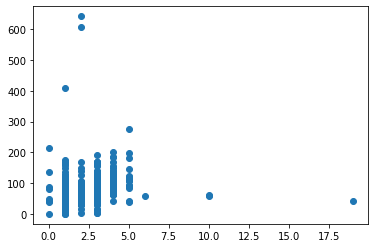

In [27]:
plt.scatter(df_train['Rooms'], df_train['Square'])

In [28]:
#df_train.loc[(df_train['Rooms'] > 5)|(df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].mode()[0]
#df_test.loc[(df_test['Rooms'] > 5)|(df_test['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].mode()[0]

## Построение моделей 

In [29]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,35,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,887.25005,0,11,B,184966.930730
1,41,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.00000,1,16,B,300009.450063
2,53,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.00000,1,3,B,220925.908524
3,58,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.00000,0,5,B,175616.227217
4,99,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.00000,2,4,B,150226.531644


In [30]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,58,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,875.743793,0,0,B
1,74,74,2.0,69.263183,48.856498,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,881.496922,0,2,B
2,190,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.000000,5,5,B
3,47,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,1248.004197,3,3,B
4,27,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,875.743793,0,0,A


In [31]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

df_train[feature_bin_names] = df_train[feature_bin_names].replace({'A':0, 'B':1})
df_test[feature_bin_names] = df_test[feature_bin_names].replace({'A':0, 'B':1})

In [32]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
X = df_train.drop(['Price'],axis = 1)
y = df_train['Price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

## Линейная регрессия

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_preds = lr_model.predict(X_train)
y_test_preds = lr_model.predict(X_test)

In [37]:
mean_absolute_error(y_test,y_test_preds)

45783.19516902056

In [38]:
r2_score(y_test,y_test_preds)

0.4528460184356303

In [39]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(lr_model, X, y, cv=cv, scoring='r2', n_jobs=-1)
scores

array([ 4.46541895e-01, -6.61329179e-01,  4.87645150e-01, -1.39685384e+03,
        5.43185638e-01])

## Дерево случайных решений

In [40]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
y_test_preds = dt_model.predict(X_test)

In [42]:
r2_score(y_test,y_test_preds)

0.4727730254033139

## Лес случайных решений

In [43]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=6, 
                               n_estimators=100,
                               random_state=42)

In [44]:
params = {
    'n_estimators': [400],
    'max_depth': [18,19,20],
    'max_features': [5,6,7]
}

In [45]:
forest_grid = GridSearchCV(forest, params, scoring='r2', 
                  cv=KFold(n_splits=10, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X, y)
print(forest_grid.best_params_)
print('R2 на train: {:.5f}'.format(forest_grid.best_score_))

{'max_depth': 20, 'max_features': 6, 'n_estimators': 400}
R2 на train: 0.75028


Итак как мы видим почти без предобработки данных мы достигли показателя предсказания в районе 0.75

In [71]:
forest_best = forest_grid.best_estimator_

y_pred = forest_best.predict(df_test)

In [62]:
preds = pd.DataFrame()
preds['Id'] = df_test['Id']
preds['Price'] = y_pred
preds.head()

,Id,Price
0,725,160535.332612
1,15856,233403.424457
2,5480,234726.559533
3,15664,336665.912617
4,14275,144733.390304


In [63]:
preds.to_csv('submission_1.csv', index=False)

In [65]:
len(preds)

5000

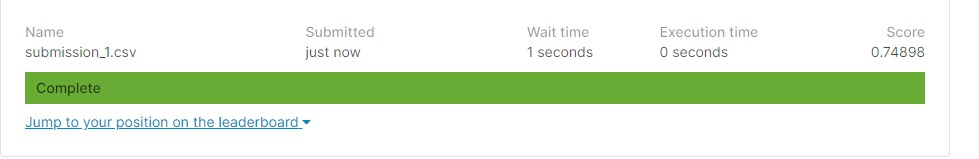

In [67]:
from IPython.display import Image
Image("Screenshot_1.jpg")

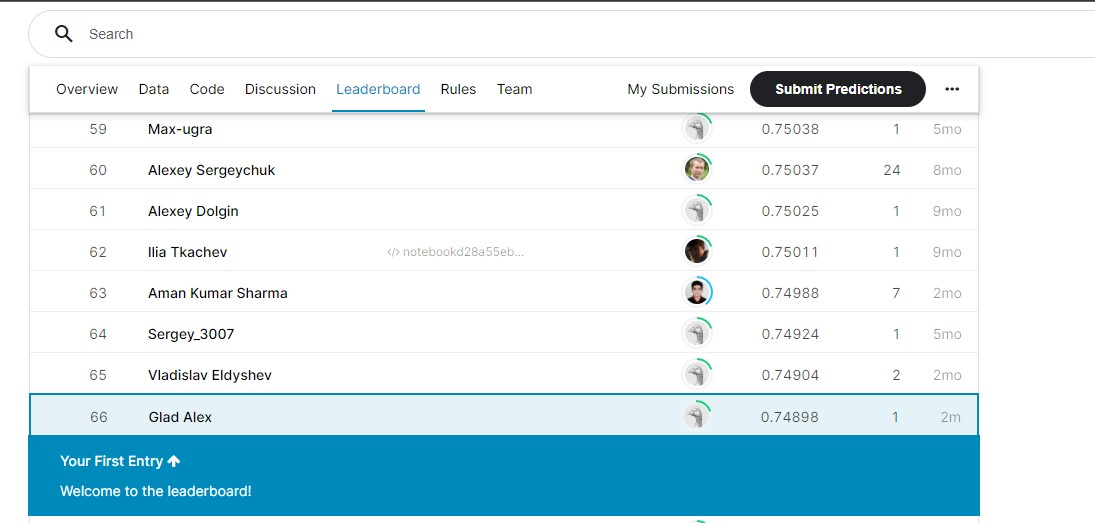

In [68]:
Image("Screenshot_2.jpg")